<a href="https://colab.research.google.com/github/jfimbett/DauphineFinancePython/blob/main/practical_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Exercises

# Python for Finance - Paris Dauphine M203



# Part 1: Code and simulate N-dimensional random walks

# Consider a 2D integer grid indexed by $i \in \mathbb{Z}$ and $j \in \mathbb{Z}$ and a random walk $X_t$ that can take any value in the set $\Omega=\{ (i,j) \text{   } \forall i \in \mathbb{Z} \text{  }j \in \mathbb{Z}\}$. Time $t$ is discrete, and given $X_t = (i,j)$ , $X_{t+1}$ can take any of the following four values with equal probability

$X_{t+1}|X_t \in \{(i-1,j), (i+1,j), (i, j+1), (i, j-1)\}$


## Create a function that given initial coordinates $(i_0, j_0)$ simulates a 2D random walk for $N$ steps. Plot the random walk

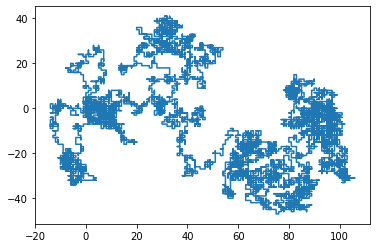

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# simulate a 2d integer random walk

def random_walk_2d(x_0, N = 1000, choices = np.array([[-1,0],[1,0],[0,-1],[0,1]])):

    story = np.zeros((N+1, 2), dtype = int)
    story[0] = x_0
    
    story[1:] = choices[np.random.randint(0,4,N)]
    return story.cumsum(axis = 0)

story = random_walk_2d([0,0], N = 10000)
# plots the random walk
plt.plot(story[:,0], story[:,1], '-')

# For a large N $\approx$ 10000, simulate K $\approx 100$ random walks starting at $(0,0)$. What % of them returned to the origin atleast once during the simulation?



In [2]:
def simulate_random_walks(N = 50000, K = 100):
  # simulate K random walks
  stories = [random_walk_2d([0,0], N = N) for _ in range(K)]
  # for each story in stories, check if the origin is in the story after the first step
  return 100*np.sum(np.array([np.any(np.all(story[1:] == [0,0], axis = 1)) for story in stories]))/K


how_many = simulate_random_walks()
how_many

78.0

# Extend the 2D random walk to 3 dimensions, plot a walk of 10000 steps. Recall that you can only modify one coordinate of the random walk at every step

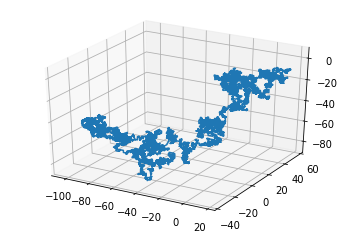

In [4]:
def random_walk_3D(x_0, N = 1000, choices = np.array([[i, j, k] for i in [-1, 0, 1] for j in [-1, 0, 1] for k in [-1, 0, 1] if np.abs(i) + np.abs(j) + np.abs(k) == 1])):
    story = np.zeros((N+1, 3), dtype = int)
    story[0] = x_0
    story[1:] = choices[np.random.randint(0, 6, N)]
    return story.cumsum(axis = 0)
  
story = random_walk_3D([0,0,0], N = 10000)
fig = plt.figure()
ax = fig.gca(projection='3d')
x, y, z = zip(*story)
ax.plot(x, y, z, label='Random walk')

plt.show()

# For a large N $\approx$ 10000, simulate K $\approx 100$ random walks starting at $(0,0,0)$. What % of them returned to the origin atleast once during the simulation?

In [6]:
def simulate_random_walks_3D(N = 50000, K = 100):
    # simulate K random walks
    stories = [random_walk_3D([0,0,0], N = N) for _ in range(K)]
    # for each story in stories, check if the origin is in the story after the first step
    return 100*np.sum(np.array([np.any(np.all(story[1:] == [0,0,0], axis = 1)) for story in stories]))/K

how_many = simulate_random_walks_3D()
how_many

28.0

# Do you observe any significant difference between the % of random walks in 2d that returned to the origin and the % of random walks in 3d that returned to the origin? Do you know the reason for this and why it happens so abruptly between $2$ and $3$ dimensions? The mathematician Shizuo Kakutani was known to refer to this result with the following quote: "A drunk man will find his way home, but a drunk bird may get lost forever"

* Can you write a function that simulates a random walk for an arbitrary number of dimensions?

In [ ]:
def random_walk(x_0, N, D):
    pass

#----------------------------------------------
# Part 2 - Programming exercises
#---------------------------------------------

In order to answer each programming question create a function based on the expected input and output of the problem

  * Your teacher has given you two integers and asked you to find out how many integers can divide both the numbers. 

  Input Formatting: There are two integers, a and b as input to the function.

  Output Formatting: Print the number of common factors of a and b.

Example:

Input: 10 15
Output: 2

Explanation: The common factors of 10 and 15 are 1 and 5. So the answer will be 2.

In [ ]:
def count_common_factors(a,b):
  pass

  * Consider a permutation of numbers from 1 to N written on a paper. Let’s denote the product of its element as ‘prod’ and the sum of its elements as ‘sum’. Given a positive integer N, your task is to determine whether ‘prod’ is divisible by ‘sum’ or not.

    Input Format: Each test case will contain an integer N (1<= N <=10^9). It is nothing but the length of the permutation.

    Output Format: For each test case, print “YEAH” if ‘prod’ is divisible by ‘sum’, otherwise print “NAH”.

In [ ]:
def does_it_divide(N):
  pass

* Suppose you have given the stock prices for respective days like (100, 180, 260, 310, 40, 535, 695). The stock price for the 1st day is 100, the 2nd day it is 180 and so on. Write a Python program to determine what days an investor should buy and sell the stocks to get the maximum profit. Assume that the investor can always sell the stock (short sale)

In [ ]:
def when_to_buy_sell(prices):
  pass